In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        Test=os.path.join(dirname,filename)
        Train=os.path.join(dirname,filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [2]:
df=pd.read_csv(Train)

In [3]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
df=df.drop(['gender','major_discipline','enrolled_university','education_level'],axis=1)

In [6]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [7]:
print("City",df.city.unique(),'\n')
print("city_development_index",df.city_development_index.unique(),'\n')
print("relevent_experience",df.relevent_experience.unique(),'\n')
print("company_type",df.company_type.unique(),'\n')
print("last_new_job",df.last_new_job.unique(),'\n')


City ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

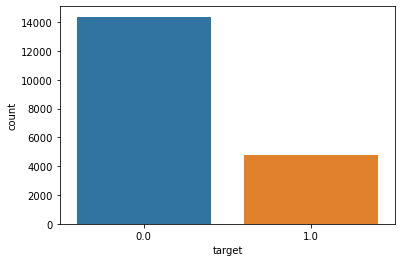

In [8]:
sns.countplot(df['target'])
#sns.countplot(df['relevent_experience'])

In [9]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [10]:
df

,enrollee_id,city,city_development_index,relevent_experience,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,No relevent experience,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,No relevent experience,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Has relevent experience,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,<1,500-999,Pvt Ltd,2,97,0.0


In [11]:
#df.enrolled_university=df.enrolled_university.fillna('Unknown')
df.experience=df.experience.fillna(1)
df.company_type=df.company_type.fillna('unknown')
df.last_new_job = df.last_new_job.fillna('nan')
df.company_size = df.company_size.fillna(1)


In [12]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
relevent_experience       0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [13]:
df.shape

(19158, 10)

In [14]:
df

,enrollee_id,city,city_development_index,relevent_experience,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,>20,1,unknown,1,36,1.0
1,29725,city_40,0.776,No relevent experience,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,5,1,unknown,never,83,0.0
3,33241,city_115,0.789,No relevent experience,<1,1,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Has relevent experience,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,14,1,unknown,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,14,1,unknown,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,<1,500-999,Pvt Ltd,2,97,0.0


In [15]:
y=df.target.astype('int')
x=df.drop(['target'],axis=1)


In [16]:
print('x\n',x.shape)
print('y\n',y.shape)

x
 (19158, 9)
y
 (19158,)


In [17]:
x

,enrollee_id,city,city_development_index,relevent_experience,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Has relevent experience,>20,1,unknown,1,36
1,29725,city_40,0.776,No relevent experience,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,No relevent experience,5,1,unknown,never,83
3,33241,city_115,0.789,No relevent experience,<1,1,Pvt Ltd,never,52
4,666,city_162,0.767,Has relevent experience,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,14,1,unknown,1,42
19154,31398,city_103,0.920,Has relevent experience,14,1,unknown,4,52
19155,24576,city_103,0.920,Has relevent experience,>20,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Has relevent experience,<1,500-999,Pvt Ltd,2,97


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=10)

In [19]:
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, '\nX_test: ', X_val.shape,  'y_test: ', y_val.shape)

X_train:  (15326, 9) y_train:  (15326,) 
X_test:  (3832, 9) y_test:  (3832,)


In [20]:
X_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [21]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# catboost-encoder
catboost_encoder = ce.CatBoostEncoder(cols=x.columns)
catboost_encoder.fit(X_train, y_train)
    
def catboost_encode_x_data(x_data):
    encoder_x_data = x_data.copy()
    encoder_x_data = catboost_encoder.transform(x_data)
    encoder_x_data.index = x_data.index
    return encoder_x_data

encoder_X_train = catboost_encode_x_data(X_train)
encoder_X_val = catboost_encode_x_data(X_val)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [22]:
encoder_X_val.shape

(3832, 9)

In [23]:
encoder_X_val.shape

(3832, 9)

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [38]:
clf.fit(encoder_X_train, y_train)
neigh.fit(encoder_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
from sklearn.metrics import mean_squared_error
y_pred=clf.predict(encoder_X_val)
y_pred_knn=neigh.predict(encoder_X_val)

In [27]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
error = mean_squared_error(y_val, y_pred)
print("MSE: ", error)

MSE:  0.2319937369519833


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
print('Accuracy score')
print(accuracy_score(y_val,y_pred))

Accuracy score
0.7520876826722338


In [31]:
dff = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
#fill_null_data(X_test)
dff.shape
dff

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [32]:
dff.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [33]:
dff=dff.drop(['gender','major_discipline','enrolled_university','education_level'],axis=1)

In [34]:
dff.shape

(2129, 9)

In [35]:
encoder_X_test = catboost_encode_x_data(dff)
y_test_predict = clf.predict(encoder_X_test)

In [36]:
submit_data = pd.DataFrame({'label': y_test_predict}, index=dff.enrollee_id)
submit_data.to_csv('submission.csv')

!head submission.csv

enrollee_id,label
32403,0
9858,0
31806,1
27385,0
27724,0
217,0
21465,1
27302,0
12994,0
